In [1]:
pwd

'/tmp/qiskit-iqx-tutorials/qiskit/circuits_advanced'

In [2]:
!date

Sun Oct 29 11:54:19 AM UTC 2023


# An Introduction to Algorithms in Qiskit

This is an introduction to algorithms in Qiskit and provides a high-level overview to help understand the various aspects of the functionality to get started. Other tutorials will provide more in-depth material, on given algorithms, and ways to use them etc.

## How is the algorithm library structured?

A. Qiskit provides a number of [Algorithms](https://qiskit.org/documentation/apidoc/algorithms.html) and they are grouped by category according to the task they can perform. 

    1. `Minimum Eigensolvers` to find the smallest eigen value of an operator, for example ground state energy of a chemistry Hamiltonian or a solution to an optimization problem when expressed as an Ising Hamiltonian. 

    2. `Linear Solvers` for linear systems of equations problems 

    3. `Amplitude Estimators` for value estimation that can be used say in financial applications. The full set of categories can be seen in the Algorithms documentation link above.

B. Algorithms are configurable and often part of the configuration will be in the form of smaller building blocks, of which different instances of the building block type can be given. 

C. For instance with `VQE`, the Variational Quantum Eigensolver, it takes a trial wavefunction, in the form of a `QuantumCircuit` and a classical optimizer among other things.

D. Let's take a look at an example to construct a VQE instance. 
    Variational Form = TwoLocal (trial wavefunction) 
    Classical optimizer = SLSQP 
    
E. These are created as separate instances and passed to VQE when it is constructed. Trying, for example, a different classical optimizer, or variational form is simply a case of creating an instance of the one you want and passing it into VQE.

In [3]:
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

num_qubits = 2
ansatz = TwoLocal(num_qubits, 'ry', 'cz')

/tmp/ipykernel_3683/3813538424.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import VQE


Let's draw the ansatz so we can see it's a `QuantumCircuit` where θ\[0\] through θ\[7\] will be the parameters that are varied as VQE optimizer finds the minimum eigenvalue. We'll come back to the parameters later in a working example below.

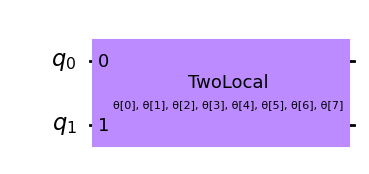

In [4]:
ansatz.draw()

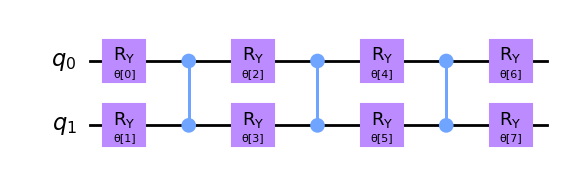

In [5]:
ansatz.decompose().draw('mpl')

In [6]:
opt = SLSQP(maxiter=1000) # Classical optimizer

But more is needed before we can run the algorithm so let's get to that next.

## How to run an algorithm?

1. Pick a  simulator or real device, on which the circuits that comprise the algorithm can be run. 

2. Device =  aer_simulator_statevector

In [7]:
from qiskit import Aer

backend = Aer.get_backend('aer_simulator_statevector')

# Creating Quantum Instance

1. Backend needs inputs like shots, do you want a noise model, even options around transpiling the circuits. 

2. For this Qiskit Terra has a [`QuantumInstance`](https://qiskit.org/documentation/stubs/qiskit.utils.QuantumInstance.html) which is provided both the backend as well as various settings around the circuit processing and execution so for instance:

In [8]:
from qiskit.utils import QuantumInstance

backend = Aer.get_backend('aer_simulator')

### Note: 

1. In order that you can run this notebook and see the exact same output the random number generator used throughout algorithms in `algorithms_globals`, as well as the transpiler and simulator, via the `QuantumInstance`, are seeded. 

2. You do not have to do this but if want to be able to reproduce the exact same outcome each time then this is how it's done.

In [9]:
from qiskit.utils import algorithm_globals
seed = 50
algorithm_globals.random_seed = seed
qi = QuantumInstance(Aer.get_backend('statevector_simulator'),shots=800,seed_transpiler=seed, seed_simulator=seed)

/tmp/ipykernel_3683/2445470471.py:4: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  qi = QuantumInstance(Aer.get_backend('statevector_simulator'),shots=800,seed_transpiler=seed, seed_simulator=seed)


Note: if you provide the backend directly then internally a `QuantumInstance` will be created from it, with default settings, so at all times the algorithms are working through a `QuantumInstance`.

So now we would be able to call the [compute_mininum_eigenvalue()](https://qiskit.org/documentation/stubs/qiskit.algorithms.VQE.html#qiskit.algorithms.VQE.compute_minimum_eigenvalue) method. The latter is the interface of choice for the application modules, such as Nature and Optimization, in order that they can work interchangeably with any algorithm within the specific category.

### So far

I. For running of the  Algorithm

    1. Defined Ansatz (Variational circuit TwoLocal with 2 qubits)
    2. Classical Optimizer, SLSQP
    3. Construct a VQE instance with the ansatz and optimizer

II. Device choosing

    1. Simulator, statevector
    2. Quantum Instance with shots and backend, seeds

## A complete working example


1. VQE will find the minimum eigenvalue, i.e. minimum energy value of a Hamiltonian operator and hence we need such an operator for VQE to work with. 

2. Operator is that of H2 molecule at 0.735A interatomic distance, could be based on any other cost function. 

3. It's a sum of Pauli terms (string of Pauli operators with coefficients)

In [10]:
from qiskit.opflow import X, Z, I

H2_op = (-1.052373245772859 * I ^ I) + \
        (0.39793742484318045 * I ^ Z) + \
        (-0.39793742484318045 * Z ^ I) + \
        (-0.01128010425623538 * Z ^ Z) + \
        (0.18093119978423156 * X ^ X)

In [11]:
vqe = VQE(ansatz, optimizer=opt, quantum_instance=qi)
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

/tmp/ipykernel_3683/3971369731.py:1: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQE`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQE``. See https://qisk.it/algo_migration for a migration guide.
  vqe = VQE(ansatz, optimizer=opt, quantum_instance=qi)


{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 65,
    'eigenstate': array([ 9.55146158e-05+0.j, -9.93766272e-01+0.j,  1.11483575e-01+0.j,
        1.77493990e-05+0.j]),
    'eigenvalue': (-1.8572750175664259+0j),
    'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): 4.296520455019831,
                              ParameterVectorElement(θ[1]): 4.426962083985579,
                              ParameterVectorElement(θ[2]): 0.5470754664946292,
                              ParameterVectorElement(θ[3]): 6.092947779034692,
                              ParameterVectorElement(θ[4]): -2.5983258978150006,
                              ParameterVectorElement(θ[5]): 1.5683260003556614,
                              ParameterVectorElement(θ[6]): -4.717618171283927,
                              ParameterVectorElement(θ[7]): 0.3602072577510429},
    'optimal_point': array([ 4.29652046,  4.42696208,  0.54707547,  6.09294778, -2.5983259 ,
        

From the above result we can see it took the optimizer `65` evaluations of parameter values until it found the minimum eigenvalue of `-1.85727` which is the electronic ground state energy of the given H2 molecule. The optimal parameters of the ansatz can also be seen which are the values that were in the ansatz at the minimum value.

## Using VQE setting `QuantumInstance` after Construction

To close off let's also create a VQE instance without supplying the `QuantumInstance`. We later set it as long as by the time VQE runs it has a `QuantumInstance` to use.

In [18]:
print(vqe.quantum_instance)


Qiskit Terra version: 0.25.1
Backend: 'statevector_simulator (AerProvider)', with following setting:
{'basis_gates': ['ccx', 'cp', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'delay', 'diagonal', 'h', 'id', 'initialize', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'kraus', 'qerror_loc', 'quantum_channel', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_probs', 'save_probs_ket', 'save_state', 'save_statevector', 'set_statevector'], 'coupling_map': None}
{'initial_layout': None, 'seed_transpiler': 50, 'optimization_level': None}
RunConfig(shots=800, seed_simulator=50, parameterizations=[])
{'timeout': None}
{}
{}
Measurement mitigation: None


In [19]:
# algorithm_globals.random_seed = seed
# qi = QuantumInstance(Aer.get_backend('aer_simulator_statevector'), seed_transpiler=seed, seed_simulator=seed)

# ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
# slsqp = SLSQP(maxiter=1000)
# vqe = VQE(ansatz, optimizer=slsqp)

vqe.quantum_instance = qi
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 56,
    'eigenstate': array([-3.89379320e-05+0.j, -9.93763503e-01+0.j,  1.11508287e-01+0.j,
       -1.78114598e-05-0.j]),
    'eigenvalue': (-1.8572750272325238+0j),
    'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): 0.3424953084812973,
                              ParameterVectorElement(θ[1]): 5.272781519503559,
                              ParameterVectorElement(θ[2]): -5.751538618286186,
                              ParameterVectorElement(θ[3]): 0.9874298448132968,
                              ParameterVectorElement(θ[4]): -0.5766792209078261,
                              ParameterVectorElement(θ[5]): -1.0564175333784893,
                              ParameterVectorElement(θ[6]): 3.2972528084401005,
                              ParameterVectorElement(θ[7]): -5.0373742198035485},
    'optimal_point': array([ 0.34249531,  5.27278152, -5.75153862,  0.98742984, -0.57667922,
    

As the identical seeding was used as the prior example the result can be seen to be the same.

This concludes this introduction to algorithms in Qiskit. Please check out the other algorithm tutorials in this series for both broader as well as more in depth coverage of the algorithms.

In [13]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright